In [1]:
import tensorflow as tf
print(tf.keras.layers.Flatten())

from tensorflow.keras import datasets

(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

image = train_x[1]
print(image.shape)

(28, 28)


In [2]:
# image 축 늘려줌
image = image[tf.newaxis, ..., tf.newaxis]
print(image.shape)

image = tf.cast(image, tf.float64)
print(image.dtype)

(1, 28, 28, 1)
<dtype: 'float64'>


In [3]:
# Conv layer 1개 만들고 통과시키기
layer = tf.keras.layers.Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='Same')
print(layer)

output = layer(image)
print(output.shape)

flatten = tf.keras.layers.Flatten()
flatten = flatten(output)
print(flatten.shape)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

(1, 28, 28, 3)
(1, 2352)


In c:\users\urse\anaconda3\envs\untitled\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\users\urse\anaconda3\envs\untitled\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\users\urse\anaconda3\envs\untitled\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In c:\users\urse\anaconda3\envs\untitled\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\users\urse\anaconda3\envs\untitled

(array([  23.,   81.,  112.,  159., 1706.,  151.,   71.,   21.,   19.,
           9.]),
 array([-192.64438 , -148.74527 , -104.84615 ,  -60.947037,  -17.047924,
          26.851189,   70.750305,  114.649414,  158.54852 ,  202.44765 ,
         246.34676 ], dtype=float32),
 <BarContainer object of 10 artists>)

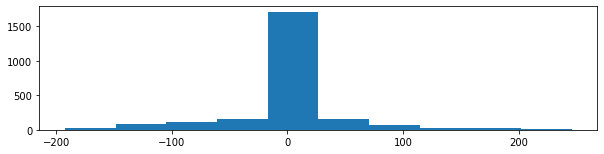

In [4]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.hist(flatten.numpy().ravel())

In [5]:
layer = tf.keras.layers.Dense(32, activation='relu')
layer2 = tf.keras.layers.Dense(10, activation='relu')

# dense_output
dense_output = layer(flatten)
print(dense_output.shape) # (1,32) - 1은 batchsize

dense_output = layer2(dense_output)
print(dense_output.shape) # (1, 10) - 1은 batchsize

(1, 32)
(1, 10)


## Dropout
- 학습할때만 끊어주기 떄문에 가중치 모양의 변화는 없음
- 추론할떄는 결국 또 전체 가중치선들사용

In [6]:
dropout_layer = tf.keras.layers.Dropout(0.7)

dropout_output = dropout_layer(dense_output)
print(dropout_output.shape)

(1, 10)
